# Image processing for NGC 309: Part2

In [2]:
import numpy as np
import math
from astropy.io import fits
import os
import sys
import matplotlib.pyplot as plt
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME+'/src')

from piXedfit_images import images_processing

In [5]:
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', 
            '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']
nbands = len(filters)

### Open the FITS file containing maps of multiband fluxes

In [6]:
hdu = fits.open("fluxmap_califa_NGC309.fits")
hdu.info()
header = hdu[0].header
print (header['unit'])
print (header)
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data
flux_err_map = hdu['FLUX_ERR'].data

Filename: fluxmap_califa_NGC309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  2  FLUX          1 ImageHDU         9   (131, 131, 12)   float64   
  3  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
1e-17
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NFILTERS=                   12                                                  Z       =            0.0188977                                                  UNIT    =                1E-17                                                  BUNIT   = 'erg/s/cm^2/A'                                                   

### Plot maps of SDSS-r and 2MASS/J band flux

/Users/abdurrouf/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


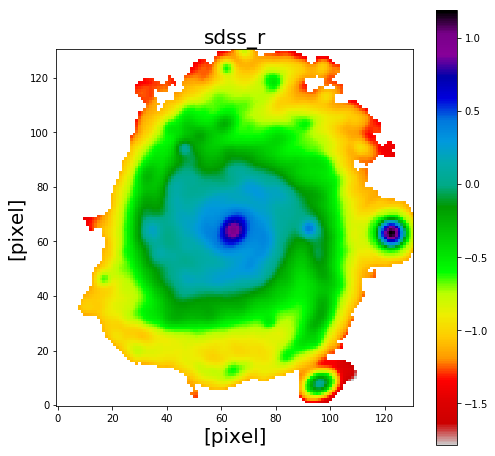

In [7]:
## plot r-band flux map:
fig1 = plt.figure(figsize=(8,8))
f1 = plt.subplot()
plt.title("%s" % filters[4], fontsize=20)
plt.xlabel("[pixel]", fontsize=20)
plt.ylabel("[pixel]", fontsize=20)
plt.imshow(np.log10(flux_map[4]), origin='lower', cmap='nipy_spectral_r')
plt.colorbar()

/Users/abdurrouf/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/abdurrouf/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


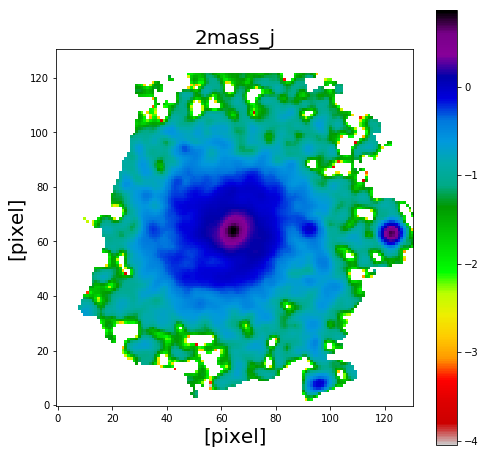

In [8]:
fig1 = plt.figure(figsize=(8,8))
f1 = plt.subplot()
plt.title("%s" % filters[7], fontsize=20)
plt.xlabel("[pixel]", fontsize=20)
plt.ylabel("[pixel]", fontsize=20)
plt.imshow(np.log10(flux_map[7]), origin='lower', cmap='nipy_spectral_r')
plt.colorbar()

### Run elliptical isophotes fitting to the r-band map 

In [10]:
data = flux_map[4]

from piXedfit_images import ellipse_fit

x0,y0,ell,pa = ellipse_fit(data=data, init_x0=65.0, init_y0=65.0, init_sma=10.0, 
                           init_ell=0.1, init_pa=10.0)

### Determine maximum radius to cut the outskirt region containing irregular 'filamentary' structures

/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


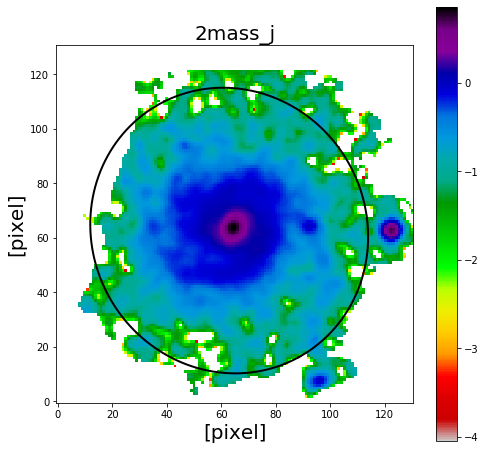

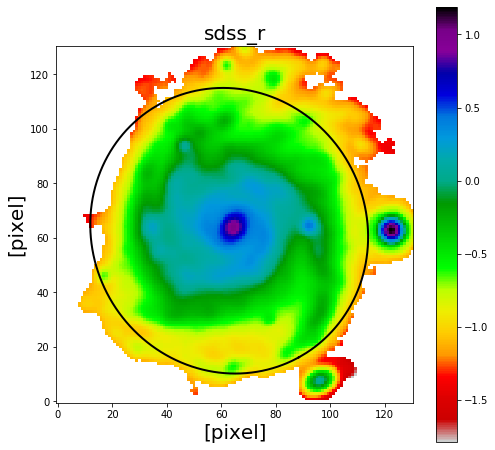

In [8]:
## draw ellipse:
from piXedfit_images import draw_ellipse

max_sma = 53.0
ellipse_xy = draw_ellipse(x0,y0,max_sma,ell,pa)

fig1 = plt.figure(figsize=(8,8))
f1 = plt.subplot()
plt.title("%s" % filters[7], fontsize=20)
plt.xlabel("[pixel]", fontsize=20)
plt.ylabel("[pixel]", fontsize=20)
plt.imshow(np.log10(flux_map[7]), origin='lower', cmap='nipy_spectral_r')
plt.colorbar()

plt.plot(ellipse_xy[0], ellipse_xy[1], lw=2, color='black')

fig1 = plt.figure(figsize=(8,8))
f1 = plt.subplot()
plt.title("%s" % filters[4], fontsize=20)
plt.xlabel("[pixel]", fontsize=20)
plt.ylabel("[pixel]", fontsize=20)
plt.imshow(np.log10(flux_map[4]), origin='lower', cmap='nipy_spectral_r')
plt.colorbar()

plt.plot(ellipse_xy[0], ellipse_xy[1], lw=2, color='black')

### Crop the selected region within the circle

In [9]:
from piXedfit_images import crop_ellipse_galregion_fits

input_fits = "fluxmap_califa_NGC309.fits"
output_fits = "crop_fluxmap_califa_NGC309.fits"
x_cent = x0
y_cent = y0
ell = ell
pa = pa
rmax = max_sma
flux_map_new = crop_ellipse_galregion_fits(input_fits,output_fits,x_cent,y_cent,ell,pa,rmax)

### Open the FITS file containing cropped maps

In [11]:
hdu = fits.open("crop_fluxmap_califa_NGC309.fits")
hdu.info()
header = hdu[0].header
print (header['unit'])
print (header)
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data
flux_err_map = hdu['FLUX_ERR'].data

Filename: crop_fluxmap_califa_NGC309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  2  FLUX          1 ImageHDU         9   (131, 131, 12)   float64   
  3  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
1e-17
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NFILTERS=                   12                                                  Z       =            0.0188977                                                  UNIT    =                1E-17                                                  BUNIT   = 'erg/s/cm^2/A'                                              

### Plot the maps of multiband fluxes

/Users/abdurrouf/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/abdurrouf/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


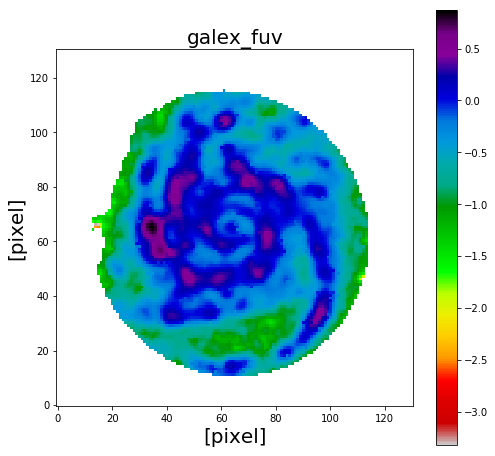

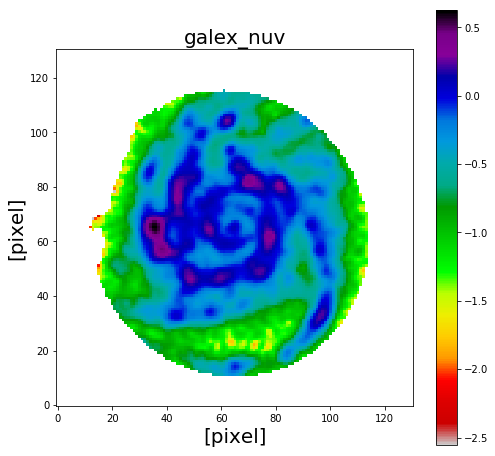

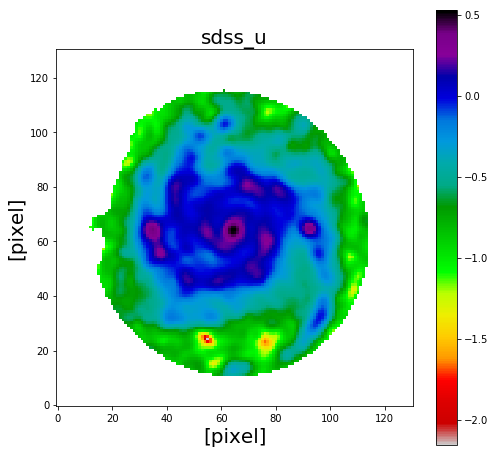

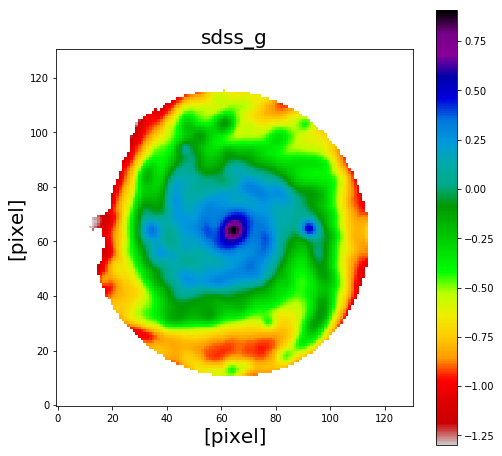

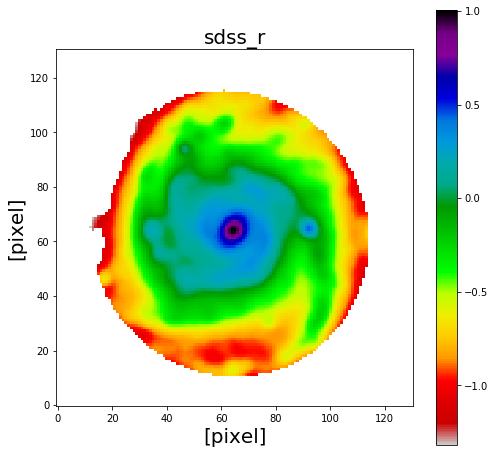

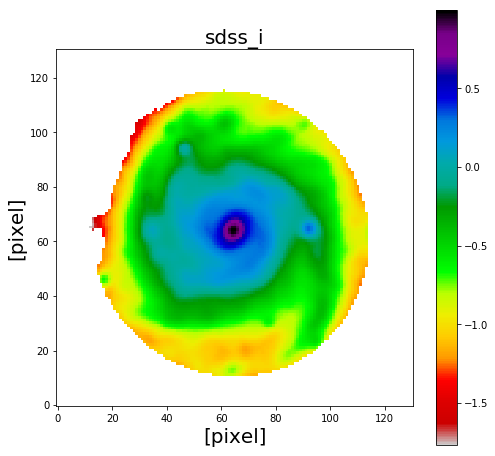

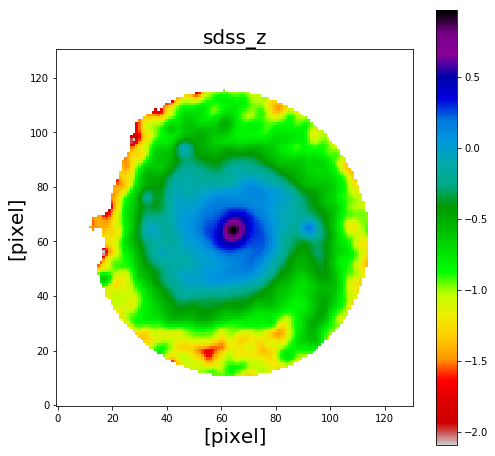

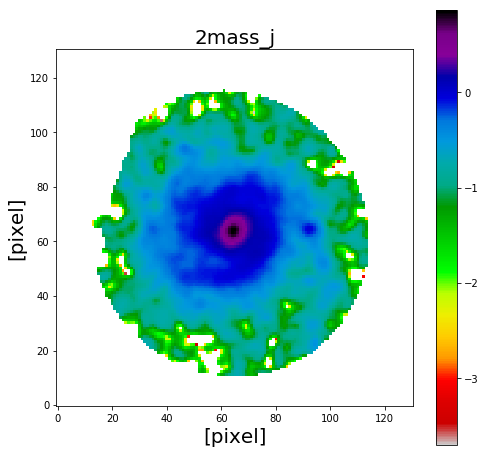

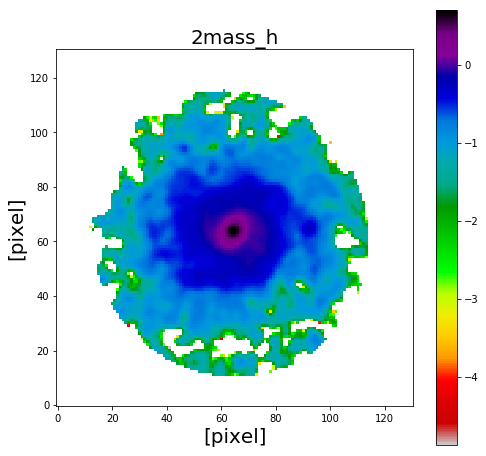

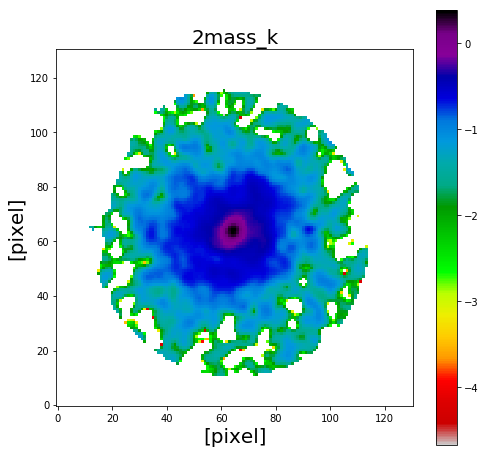

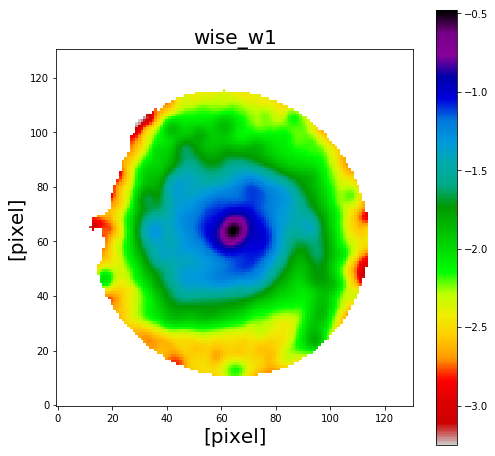

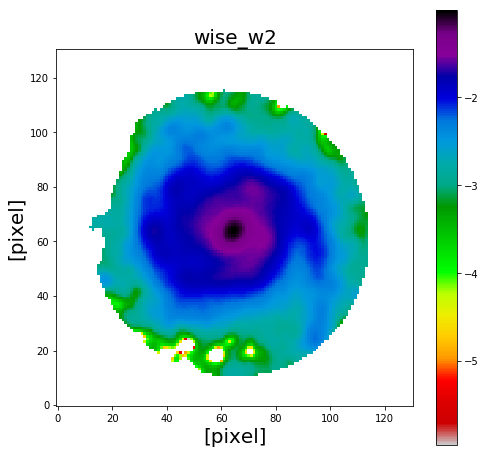

In [12]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(8,8))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[int(bb)]), origin='lower', cmap='nipy_spectral_r')
    plt.colorbar()

### Checking the results by plotting SEDs of 100 pixels within central 100x100 square 

In [13]:
### get SEDs of pixels:

## (band,y,x) ==> (y,x,band)
flux_map_trans = np.transpose(flux_map, axes=(1,2,0))
flux_err_map_trans = np.transpose(flux_err_map, axes=(1,2,0))

dim_y = gal_region.shape[0]
dim_x = gal_region.shape[1]

pix_SED = []
pix_SED_err = []
for yy in range(60,70):
    for xx in range(60,70):
        pix_SED.append(flux_map_trans[yy][xx])
        pix_SED_err.append(flux_err_map_trans[yy][xx])
    
npixs_used = len(pix_SED)
print (npixs_used)

100


### Get central wavelengths of the photometric filters using cwave_filters function

In [14]:
from filtering import cwave_filters

photo_wave = cwave_filters(filters)
print (filters)
print (photo_wave)

['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']
[ 1516.  2267.  3351.  4686.  6166.  7480.  8932. 12358. 16458. 21603.
 33526. 46028.]


### Plot the SEDs

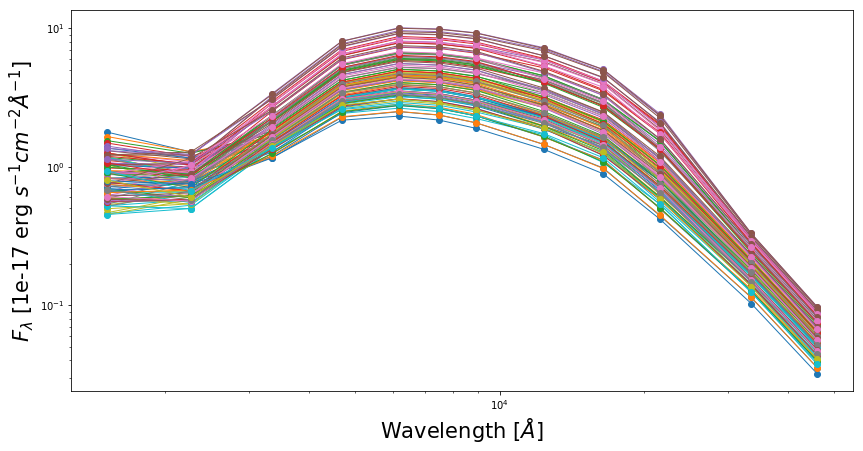

In [16]:
fig1 = plt.figure(figsize=(14,7))
f1 = plt.subplot()
f1.set_xscale('log')
f1.set_yscale('log')
plt.xlabel(r'Wavelength $[\AA]$', fontsize=21)
plt.ylabel(r'$F_{\lambda}$ [1e-17 erg $s^{-1}cm^{-2}\AA^{-1}$]', fontsize=21)

for ii in range(0,len(pix_SED)):
    plt.errorbar(photo_wave, pix_SED[ii], yerr=0, fmt='-o', lw=1)